# Datacard

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

1. CRIM:     per capita crime rate by town
2. ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS:    proportion of non-retail business acres per town
4. CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX:      nitric oxides concentration (parts per 10 million) 
6. RM:       average number of rooms per dwelling
7. AGE:      proportion of owner-occupied units built prior to 1940
8. DIS:      weighted distances to ﬁve Boston employment centers
9. RAD:      index of accessibility to radial highways
10. TAX:     full-value property-tax rate per 10,000 in dollars.
11. PTRATIO: pupil-teacher ratio by town
12. B:       1000(Bk−0.63)2 where Bk is the proportion of african american by town.
13. LSTAT:   % lower status of the population
14. MEDV:    Median value of owner-occupied homes in $1000s
    
We can see that the input attributes have a mixture of units.


# Objective

1. Data Preparation including handling missing values, normalisation of data values
2. Exploratory data analysis
3. Data Modelling - Predicting various regression mode

# Imports

In [111]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [112]:
# Refer - https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

columns = "CRIM ZN INDUS CHAS NOX RM AGE DIS RAD TAX PTRATIO B LSTAT MEDV".split(" ")

In [113]:
# Importing dataset

df = pd.read_csv("./dataset/housing.csv", sep = r'\s+', names = columns)

## Meta data

In [114]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [115]:
# Shape of data

print(f'Dataset has {df.shape[1]} features with {df.shape[0]} data points')

Dataset has 14 features with 506 data points


In [116]:
# Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


No missing values and every feature belongs to metric value (numerical value).

In [117]:
# Changing the data type of feature CHAS (whether river bounded or not)

df = df.astype({"CHAS":"boolean"}, copy = False)

In [126]:
# Checking for missing values

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [128]:
# Checking for duplicate entries

df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis

In [125]:
# Describe - Boolean features

df.describe(include = ["boolean"])

,CHAS
count,506
unique,2
top,False
freq,471


In [118]:
# Describe - Numerical features

df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Distribution
including **Skewness and tailedness**

#### Boxplot

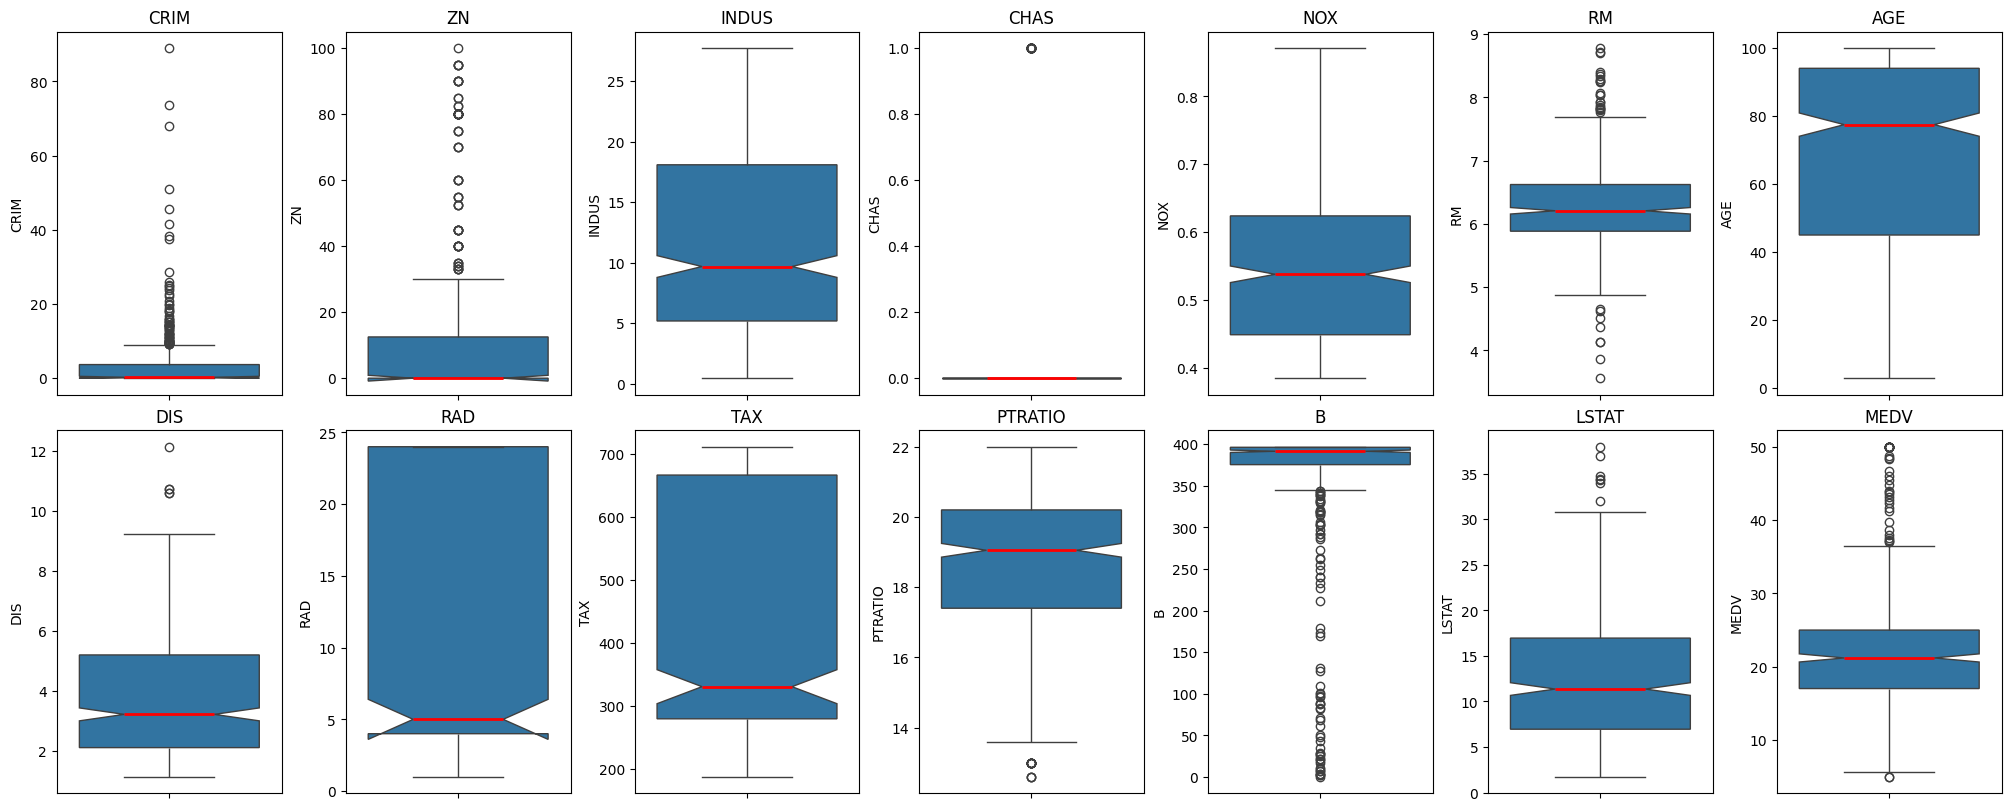

In [119]:
# Discriptive statistics of features

row, col = 2, 7
fig, axs = plt.subplots(row,col,figsize=(20,8), layout="constrained")

for i in range(row):
    for j in range(col):
        index =  col * i +  j
        feature = columns[index]
        axs[i,j].set_title(feature)
        sns.boxplot(df[feature], ax =axs[i, j], 
                    notch= True,
                    medianprops ={"color":"r", "linewidth":2})

Discriptive analysis:
1. CRIM - small variability, positively skewed, lot of outliers with some extreme values
2. ZN - medium variablility, positively skewed with lot of outliers
3. INDUS - high variablility of data with slite postive skew without outliers
4. CHAS - boolean value -  positve skew
5. NOX - wide range of data with high variability withour outliers
6. RM  - wide range of data points with outliers (n/a)
7. AGE - wide range of data points with negative skew and no outliers
8. DIS - wide range of data points with positive skew with some outliers
9. RAD - high variability with positive skew and no outliers
10. TAX - high variablility with postive skew and no outliers
11. PTRATIO - wide range of values with negative skew
12. B - small range and variability with outliers
13. LSTAT - wide range with symmetric distribution with outliers
14. MEDV - wide range with medium variability and outliers

outliers present in 6 features  - CRIM, ZN,RM, DIS, B, LSTAT. Linear models are very sensitive to outliers. even though tree based models doesnot affected by it. so, we can use outlier treated data for linear models and vice versa.

#### Kde plot

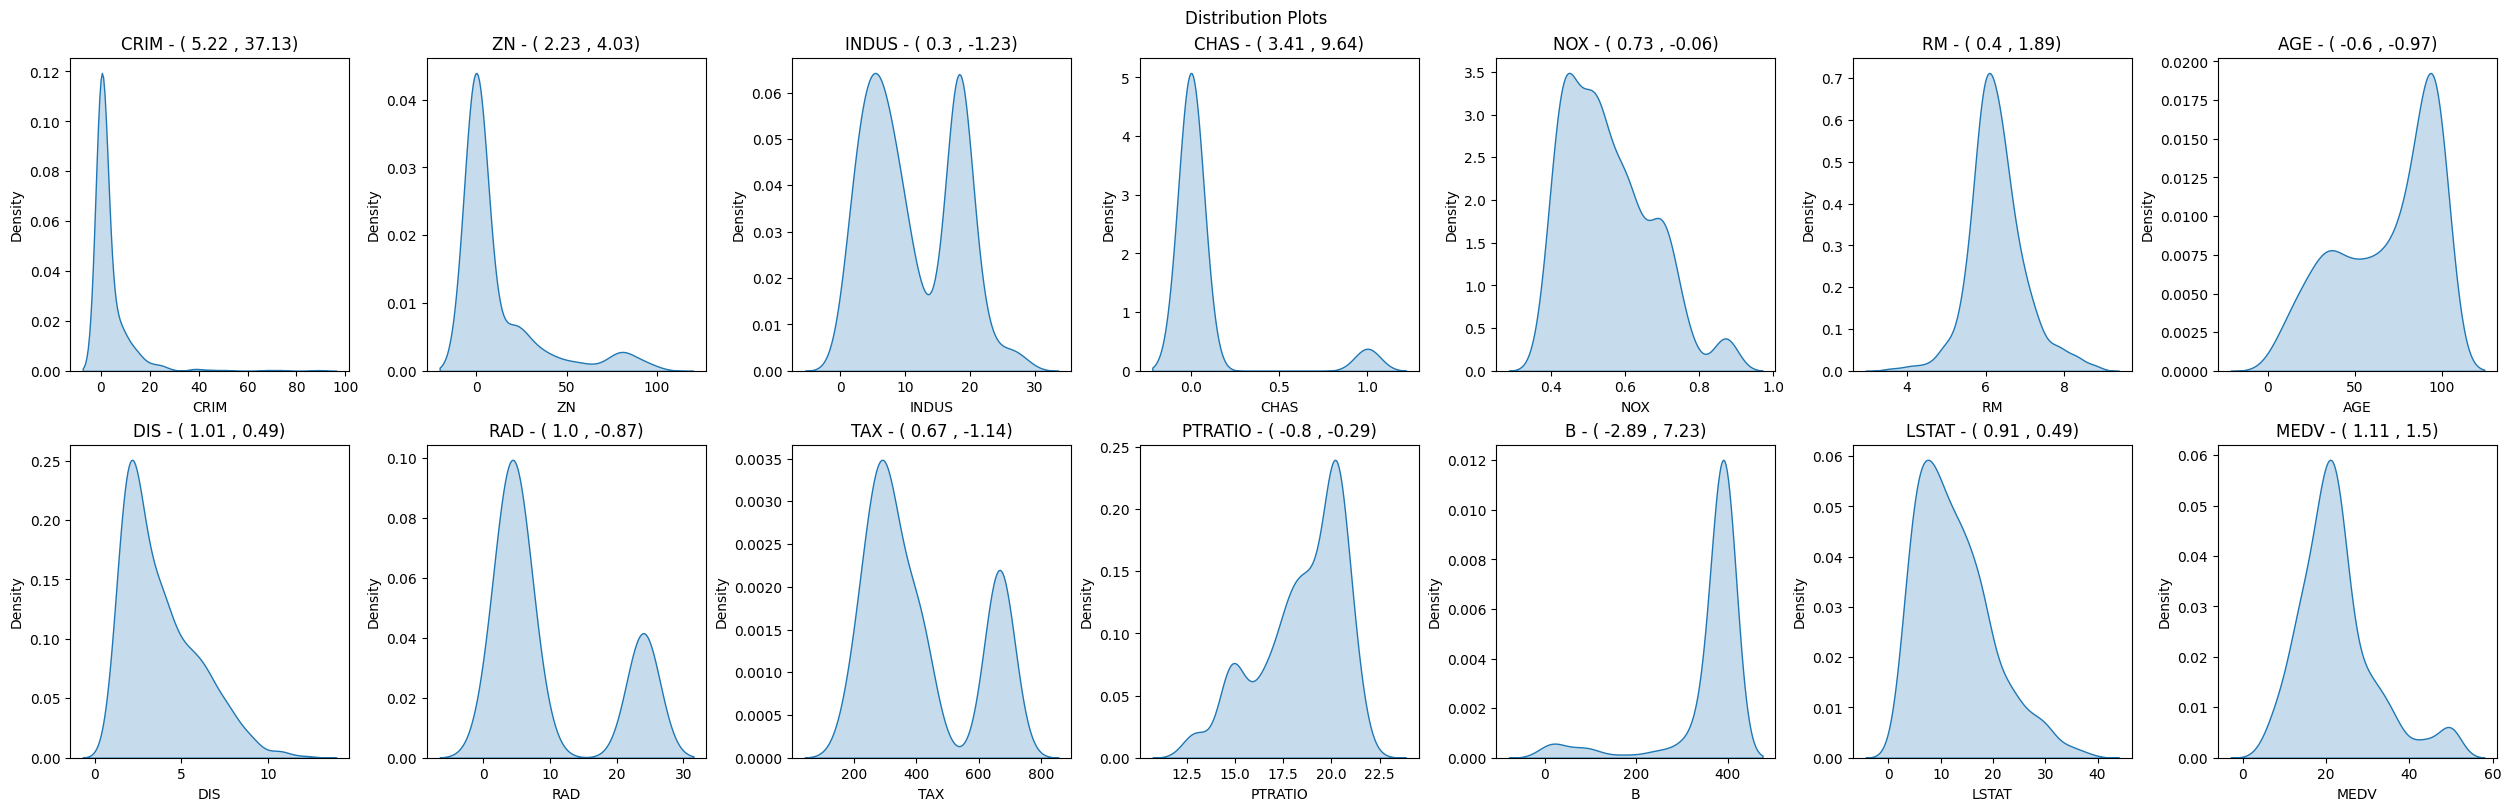

In [152]:
# Kde Plot

row, col = 2,7

fig,axs = plt.subplots(2,7, figsize = (25,8), layout= "constrained")
fig.suptitle("Distribution Plots")
for i in range(row):
    for j in range(col):
        index = (col * i)  + j 
        feature = columns[index]
        skew = round(df[feature].skew(),2)
        kurt = round(df[feature].kurt(),2)
        sns.kdeplot(data = df, x = feature, fill = True, ax =axs[i,j])
        axs[i,j].set_title(f"{feature} - ( {skew} , {kurt})")


1. **Finding in order(DESC):**
    extreme outliers -> CHIM, CHASE, B
    skewed data : positive -> CRIM, CHAS, ZN; negative -> B
2. **OTHERS:**
        INDUS - have dual modal distribution (two different groups within data)
   


### Correlation

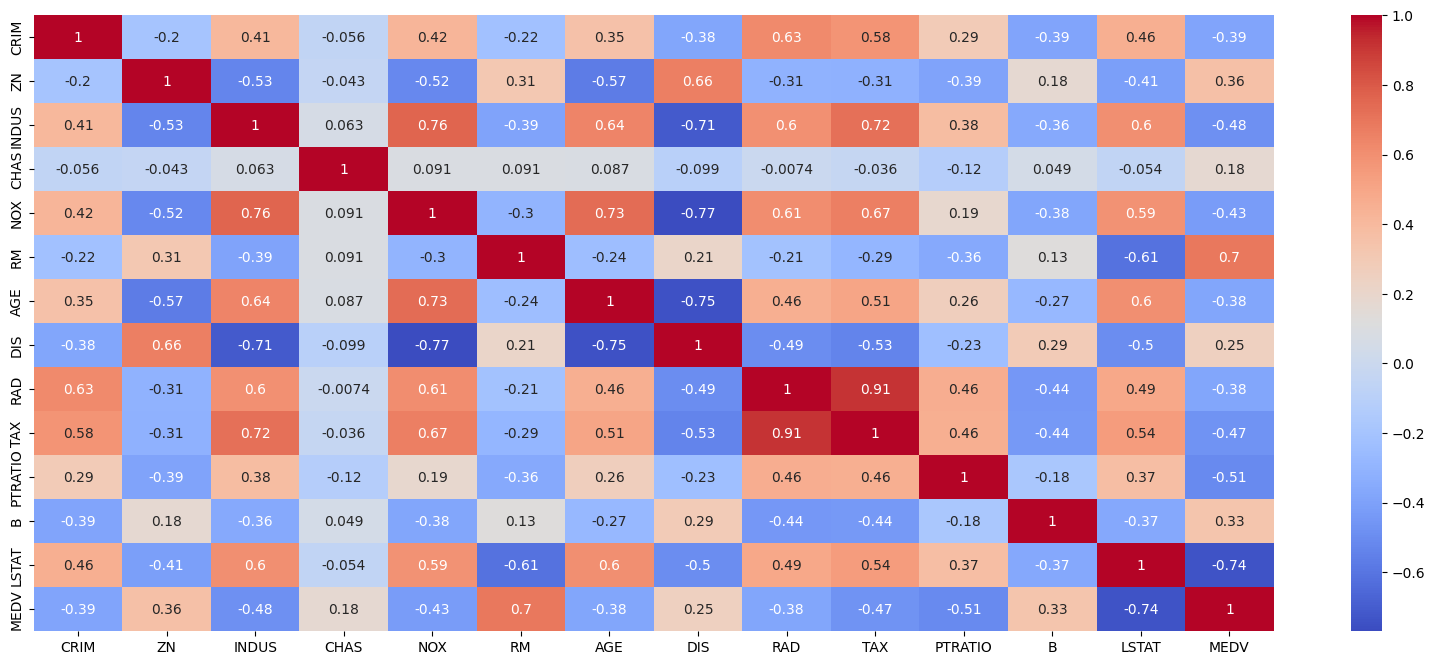

In [158]:
# Heatmap

plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), annot = True, cmap ="coolwarm")
plt.show()

**Findings:**
1. Strong correlation : features RAD and TAX has perfect positive correlation
2. moderate to strong positive correlation: NOX and INDUS, NOX and AGE, TAX and INDUS, RM and DEDV
3. moderate to strong negative correlation: NOX and DIS, DIS and AGE, LSTAT and MEDV, DIS and INDUS.
4. features RM, LSTAT have strong correlation with targat variable

In [149]:
type(round(df["CHAS"].kurt(),2))

numpy.float64

In [80]:
# Metrics

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

CRIM per capita crime rate by town - ZN proportion of residential land zoned for lots over 25,000 sq.ft. - INDUS proportion of non-retail business acres per town - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) - NOX nitric oxides concentration (parts per 10 million) - RM average number of rooms per dwelling - AGE proportion of owner-occupied units built prior to 1940 - DIS weighted distances to five Boston employment centres - RAD index of accessibility to radial highways - TAX full-value property-tax rate per $10,000 - PTRATIO pupil-teacher ratio by town - B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town - LSTAT % lower status of the population - MEDV Median value of owner-occupied homes in $1000's

In [81]:
# dataset
train_df = pd.read_csv("./dataset/train.csv")
test_df = pd.read_csv("./dataset/test.csv")

In [82]:
train_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [83]:
train_df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [85]:
# NO missing values found

In [86]:
test_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [87]:
columns = train_df.columns

In [88]:
columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [89]:
train_df[columns[0]].unique()

array(['Owner', 'Dealer', 'Builder'], dtype=object)

In [90]:
train_df[columns[4]].unique()

array(['BHK', 'RK'], dtype=object)

### Encoding

In [91]:
from src.preproccessing import encoding
onehot_encoder = encoding.OneHotEncoding()

In [92]:
# One hot encoding the column "posted_by" 
posted_by_encoded = onehot_encoder.encode(train_df, columns[0])
train_df.drop(labels=[columns[0]], axis = 1, inplace = True)
train_df = pd.concat([train_df, posted_by_encoded], axis= 1)

In [93]:
# One hot encoding the column "BHK_or_Rk"
bhk_or_rk_encoding = onehot_encoder.encode(train_df, columns[4])
train_df.drop(columns=[columns[4]], axis = 1, inplace=True)
train_df = pd.concat([train_df, bhk_or_rk_encoding], axis = 1)

In [94]:
train_df.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK
0,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0.0,0.0,1.0,1.0,0.0
1,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,0.0,1.0,0.0,1.0,0.0
2,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0.0,0.0,1.0,1.0,0.0
3,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,0.0,0.0,1.0,1.0,0.0
4,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,0.0,1.0,0.0,1.0,0.0


### Explorary data analysis

In [95]:
train_df

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK
0,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,0.0,0.0,1.0,1.0,0.0
1,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,0.0,1.0,0.0,1.0,0.0
2,0,0,2,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,0.0,0.0,1.0,1.0,0.0
3,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,0.0,0.0,1.0,1.0,0.0
4,1,0,2,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0,0.0,0.0,1.0,1.0,0.0
29447,0,0,2,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0,0.0,0.0,1.0,1.0,0.0
29448,0,0,2,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1,0.0,1.0,0.0,1.0,0.0
29449,0,0,2,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0,0.0,0.0,1.0,1.0,0.0


In [96]:
print(np.shape(df))

NameError: name 'df' is not defined

In [9]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
5,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
6,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
7,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
8,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9
9,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,15.0


In [60]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [61]:
# null value

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [62]:
# missing values

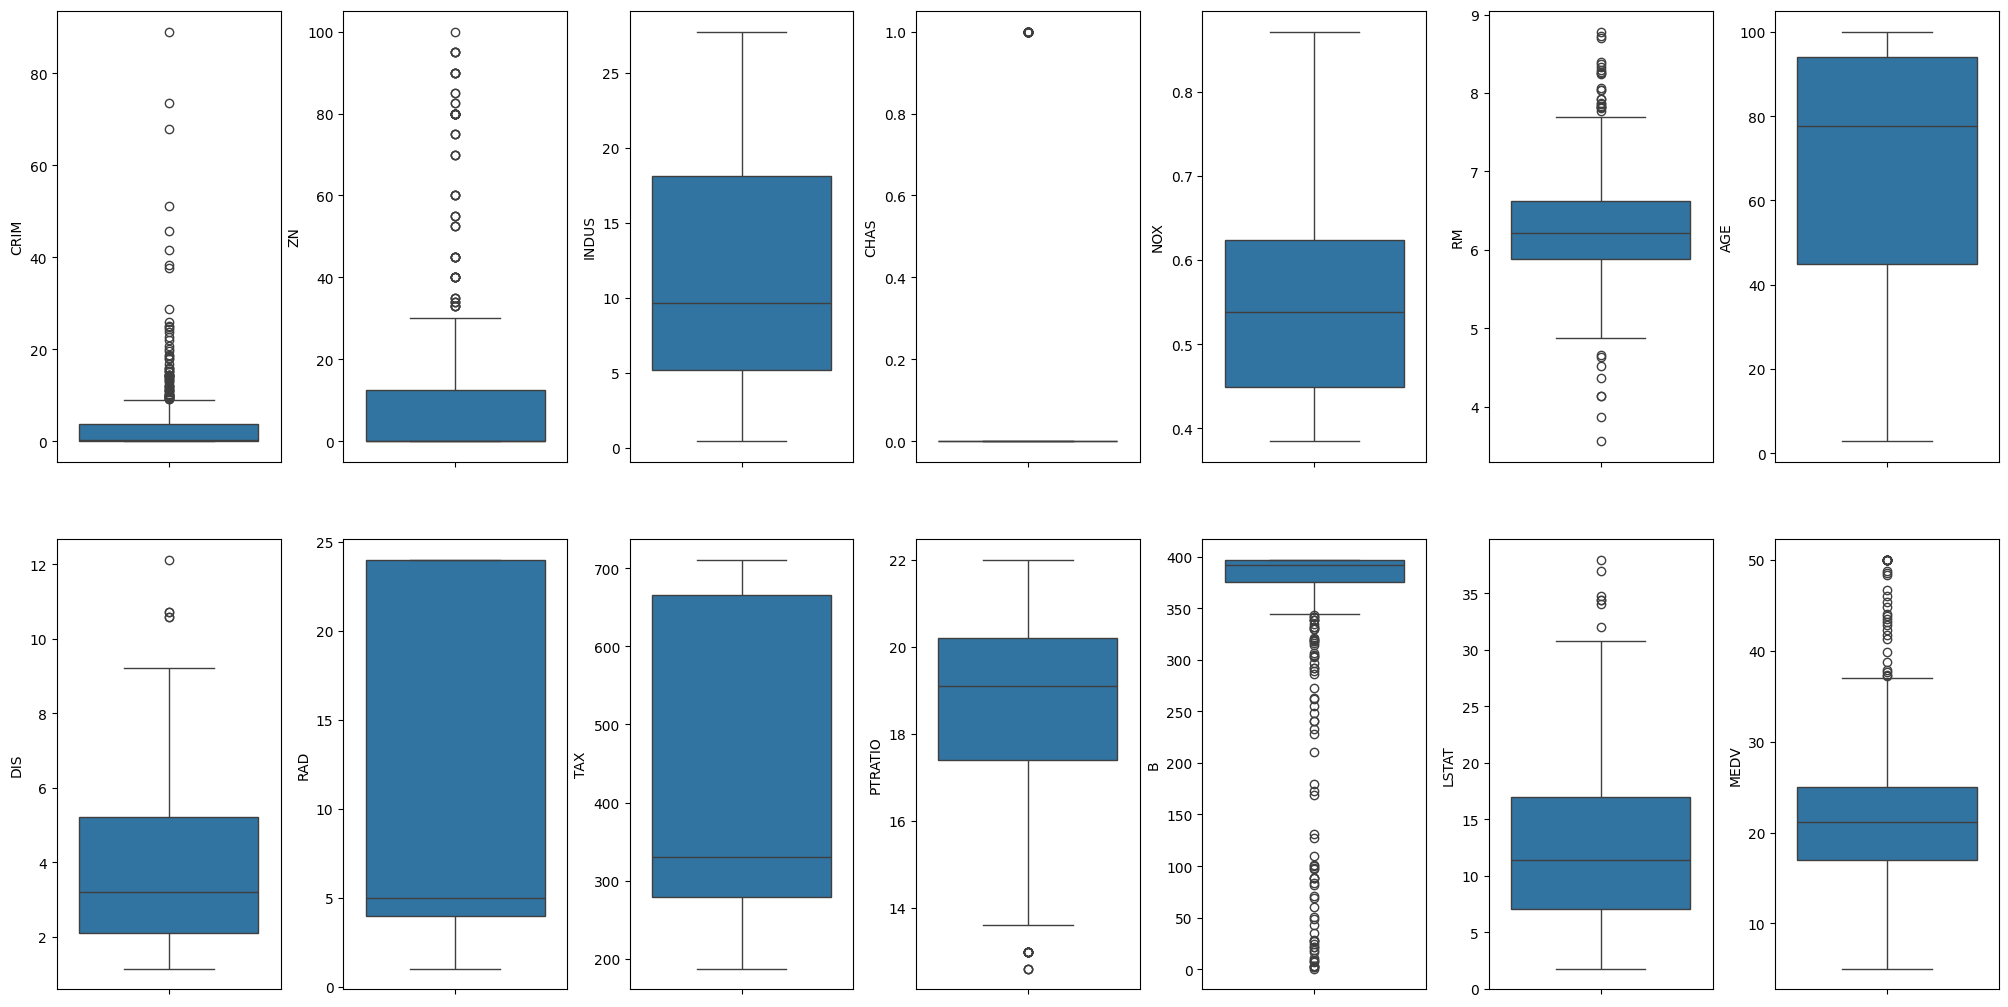

In [63]:


fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=ax[index])
    index+=1

plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)
plt.show()

In [67]:
features = df.iloc[:, :-1]

In [68]:
target = df.iloc[:,-1]
target = np.reshape(target, (505,1))

In [69]:
features.shape

(505, 13)

In [70]:
target.shape

(505, 1)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20)

In [73]:
x_train.shape

(404, 13)

In [74]:
x_test.shape

(101, 13)

In [75]:
y_train.shape

(404, 1)

In [76]:
y_test.shape

(101, 1)

In [84]:
def LinearRegressionOP(x_train, x_test, y_train, y_test):

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    metric_dic = {"mse":mean_squared_error(y_test,y_pred),
                  "r2":r2_score(y_test,y_pred),
                  "rmse":root_mean_squared_error(y_test,y_pred),
                  "mas":mean_absolute_error(y_test,y_pred)}
    print(metric_dic)
    return metric_dic

    

In [85]:
lr = LinearRegressionOP(x_train,x_test,y_train,y_test)

{'mse': np.float64(15.70937141179372), 'r2': 0.7989919981630241, 'rmse': np.float64(3.9635049403014144), 'mas': np.float64(2.7723609429083873)}


In [86]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
